In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

x = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1]])
y = np.array([[0],[1],[0], [1],[0], [1]])

model = Sequential()
model.add(Dense(input_shape=(3,), units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

C:\Users\ahmed.habib\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [2]:
history = model.fit(x, y , epochs=300 , batch_size=2)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7708 - loss: 0.6587 
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4583 - loss: 0.6842     
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7708 - loss: 0.6344 
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8333 - loss: 0.6380 
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5833 - loss: 0.6589 
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7083 - loss: 0.6638
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5833 - loss: 0.6515 
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5833 - loss: 0.6506 
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7708 - loss: 0.6422 
Epoch 10/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4583 - loss: 0.6825    
Epoch 11/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5833 - loss: 0.6600 
Epoch 12/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6

In [3]:
loss , accuracy = model.evaluate(x, y)
print('Accuracy : ' , round(accuracy, 2) *100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 1.0000 - loss: 0.0472
Accuracy :  100.0


In [4]:
y_pred = model.predict(x)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[0.08017416]
 [0.9508738 ]
 [0.03222951]
 [0.967634  ]
 [0.05174097]
 [0.9702595 ]]


In [5]:
threshold = 0.5
y_pred_class = (y_pred > threshold).astype(int)
print(y_pred_class)

[[0]
 [1]
 [0]
 [1]
 [0]
 [1]]


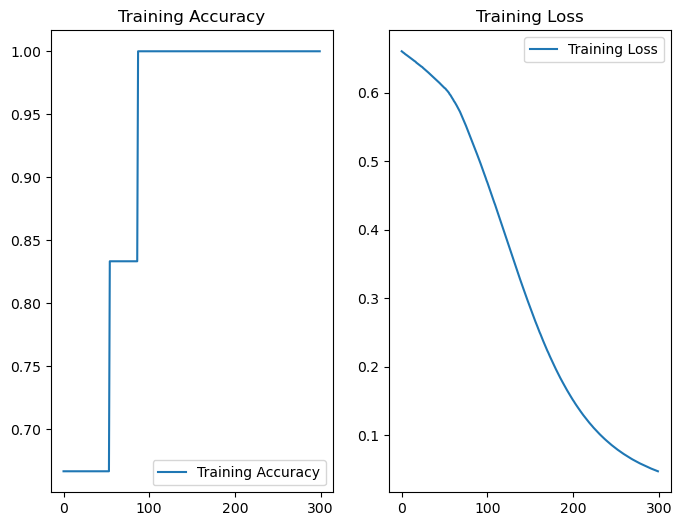

In [6]:
import matplotlib.pyplot as plt 
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(acc , label='Training Accuracy')
plt.legend(loc= 'lower right')
plt.title('Training Accuracy')
plt.subplot(1, 2, 2) 
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()
